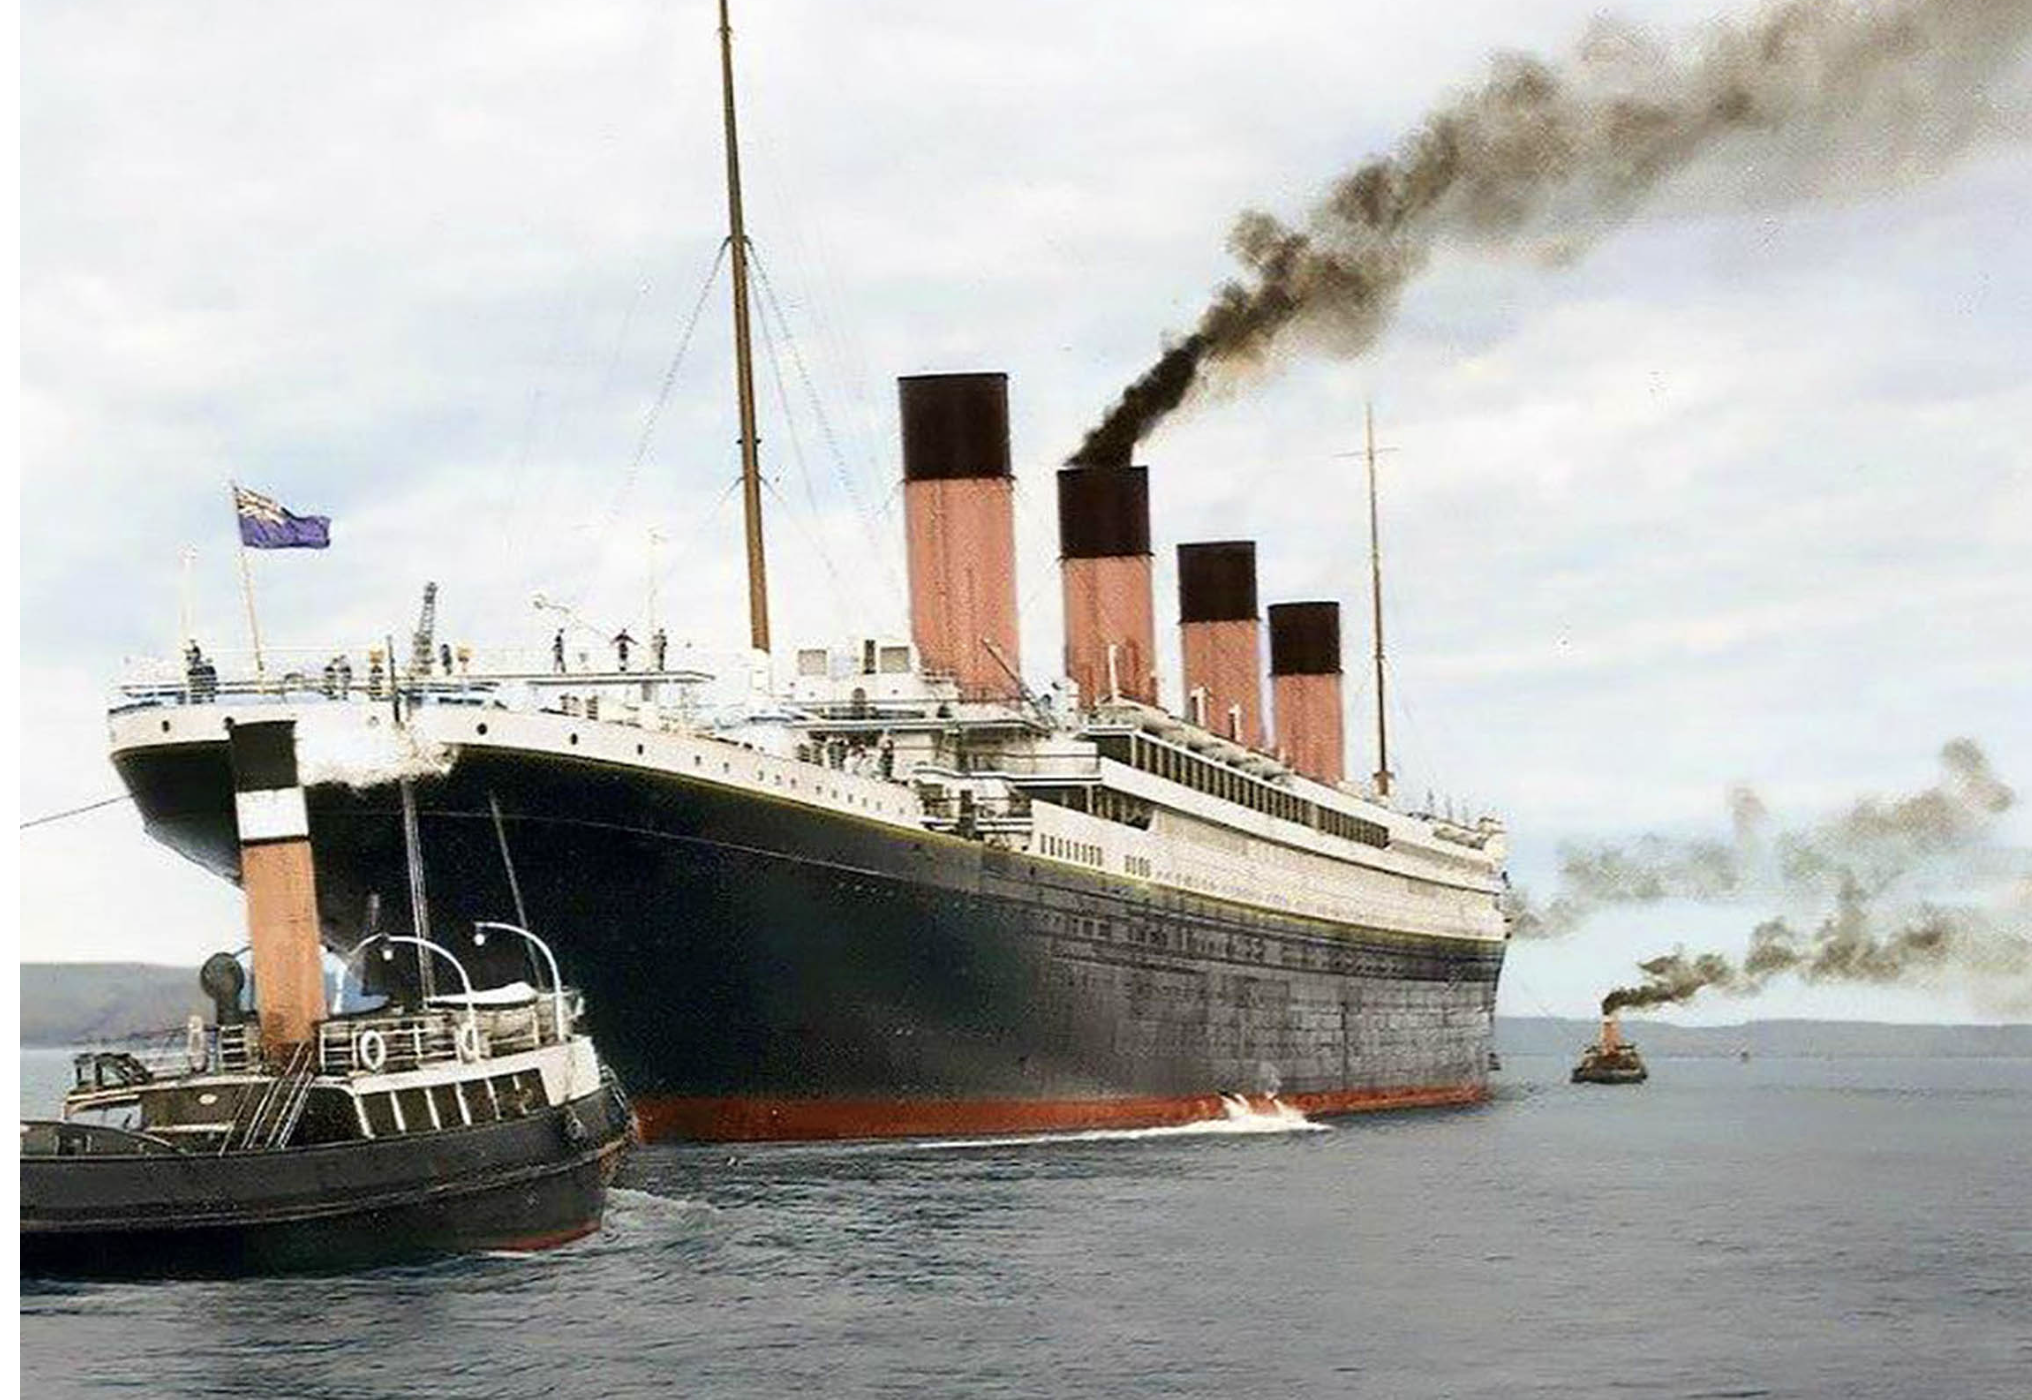

In [47]:
from IPython.display import Image, display
display(Image(filename='titanic.png'))

**Project Objective:** To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival on the Titanic. This notebook will serve as a complete guide, covering data loading, cleaning, analysis, feature engineering, and visualization, with theoretical explanations at each stage.

- Step 1: Setup - Importing Libraries
- Step 2: Data Loading and Initial Inspection
- Step 3: Data Cleaning
- Step 4: Univariate Analysis
- Step 5: Bivariate Analysis
- Step 6: Feature Engineering
- Step 7: Multivariate Analysis
- Step 8: Correlation Analysis

In [2]:
#import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# set a style
sns.set(style= 'whitegrid')

In [4]:
#load Data set
df= pd.read_csv("Titanic-Dataset.csv")
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df.shape


(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- The dataset contains 891 entries (passengers) and 12 columns.
- Missing Values Identified: Age, Cabin, and Embarked have missing values. Cabin is missing a significant amount of data (~77%), which will require special attention.

In [8]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

- **Survived:** About 38.4% of passengers in this dataset survived.
- **Age:** The age ranges from ~5 months to 80 years, with an average age of about 30.
- **Fare:** The fare is highly skewed, with a mean of 14.45. The maximum fare is over $512, indicating the presence of extreme outliers.

In [16]:
df[(df['Sex'] == 'female')& (df['Embarked']== 'Q')]

PassengerId  Survived  Pclass  \
22            23         1       3   
28            29         1       3   
32            33         1       3   
44            45         1       3   
47            48         1       3   
82            83         1       3   
109          110         1       3   
156          157         1       3   
186          187         1       3   
198          199         1       3   
208          209         1       3   
241          242         1       3   
264          265         0       3   
274          275         1       3   
289          290         1       3   
300          301         1       3   
303          304         1       2   
322          323         1       2   
330          331         1       3   
358          359         1       3   
359          360         1       3   
368          369         1       3   
412          413         1       1   
501          502         0       3   
502          503         0       3   
573          574         1       3   
593          594         0       3   
612          613         1       3   
653          654         1       3   
654          655         0       3   
657          658         0       3   
680          681         0       3   
697          698         1       3   
727          728         1       3   
767          768         0       3   
885          886         0       3   

                                                Name     Sex   Age  SibSp  \
22                       McGowan, Miss. Anna "Annie"  female  15.0      0   
28                     O'Dwyer, Miss. Ellen "Nellie"  female   NaN      0   
32                          Glynn, Miss. Mary Agatha  female   NaN      0   
44                     Devaney, Miss. Margaret Delia  female  19.0      0   
47                         O'Driscoll, Miss. Bridget  female   NaN      0   
82                    McDermott, Miss. Brigdet Delia  female   NaN      0   
109                              Moran, Miss. Bertha  female   NaN      1   
156                 Gilnagh, Miss. Katherine "Katie"  female  16.0      0   
186  O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)  female   NaN      1   
198                 Madigan, Miss. Margaret "Maggie"  female   NaN      0   
208                        Carr, Miss. Helen "Ellen"  female  16.0      0   
241                   Murphy, Miss. Katherine "Kate"  female   NaN      1   
264                               Henry, Miss. Delia  female   NaN      0   
274                       Healy, Miss. Hanora "Nora"  female   NaN      0   
289                             Connolly, Miss. Kate  female  22.0      0   
300         Kelly, Miss. Anna Katherine "Annie Kate"  female   NaN      0   
303                              Keane, Miss. Nora A  female   NaN      0   
322                        Slayter, Miss. Hilda Mary  female  30.0      0   
330                               McCoy, Miss. Agnes  female   NaN      2   
358                             McGovern, Miss. Mary  female   NaN      0   
359                Mockler, Miss. Helen Mary "Ellie"  female   NaN      0   
368                              Jermyn, Miss. Annie  female   NaN      0   
412                           Minahan, Miss. Daisy E  female  33.0      1   
501                              Canavan, Miss. Mary  female  21.0      0   
502                   O'Sullivan, Miss. Bridget Mary  female   NaN      0   
573                                Kelly, Miss. Mary  female   NaN      0   
593                               Bourke, Miss. Mary  female   NaN      0   
612                      Murphy, Miss. Margaret Jane  female   NaN      1   
653                    O'Leary, Miss. Hanora "Norah"  female   NaN      0   
654                     Hegarty, Miss. Hanora "Nora"  female  18.0      0   
657                    Bourke, Mrs. John (Catherine)  female  32.0      1   
680                              Peters, Miss. Katie  female   NaN      0   
697                 Mullens, Miss. Katherine "Katie"  fem

In [17]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

#### Data Cleaning
- Numerical Data: For skewed distributions (like Age and Fare), using the median is more robust than the mean because it is not affected by outliers.
- Categorical Data: A common strategy is to fill with the mode (the most frequent value).
- High Cardinality/Too Many Missing Values: For columns like Cabin, where most data is missing, imputing might not be effective. We could either drop the column or engineer a new feature from it (e.g., Has_Cabin).

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
median_age= df['Age'].median()
df['Age']= df['Age'].fillna(median_age)

In [28]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [30]:
df['Has_Cabin'] = df['Cabin'].notna().astype(int) # 1 if has cabin, 0 if not
df.drop('Cabin', axis=1, inplace=True) # Drop the original column

In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

**Univariate Analysis:** The data being analyzed contains only one variable. The main purpose is to describe the data and find patterns within it.
- For Categorical Variables: We use frequency tables, bar charts (countplot), or pie charts to see the count or proportion of each category.
- For Numerical Variables: We use histograms (histplot) or kernel density plots (kdeplot) to understand the distribution, and box plots (boxplot) to identify the central tendency, spread, and outliers.

Analyzing categorical features:


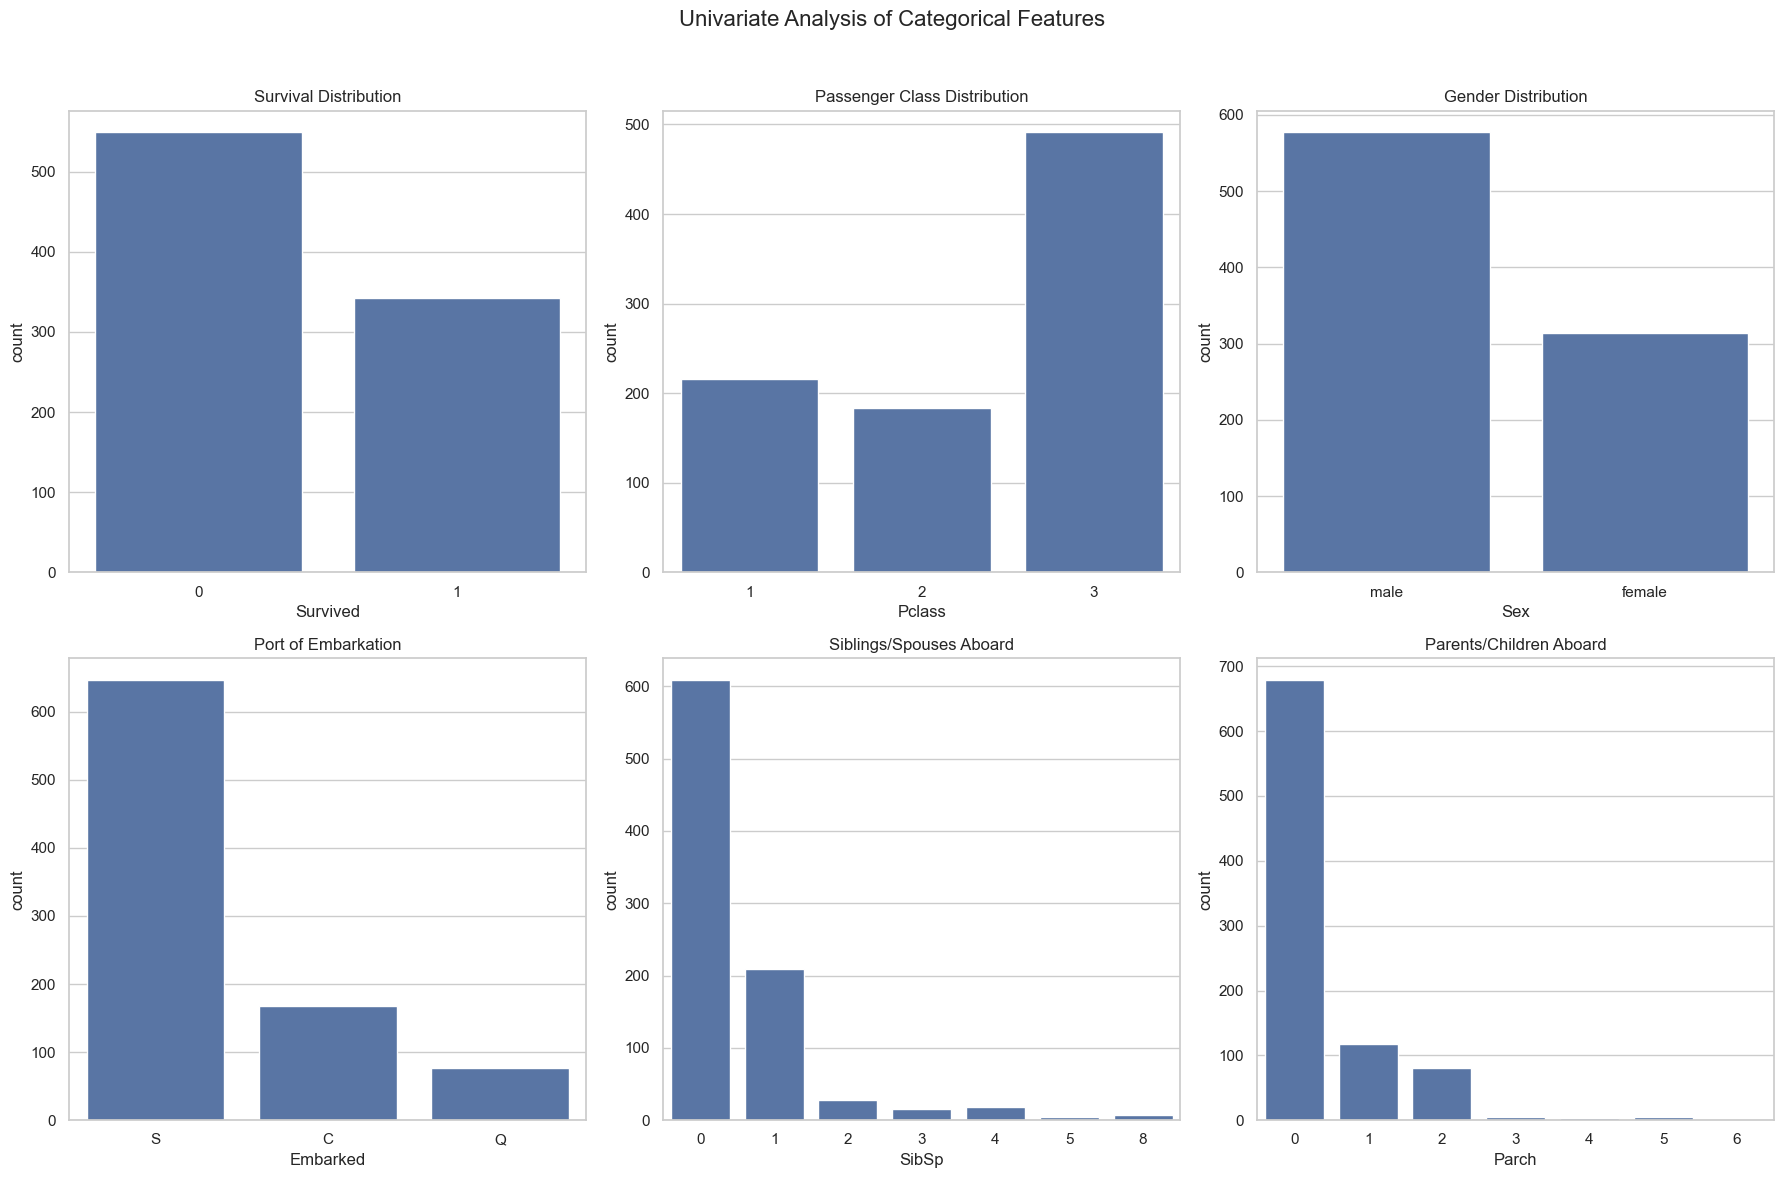

In [32]:
print("Analyzing categorical features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Categorical):**
- Survival: Most passengers (over 500) did not survive.
- Pclass: The 3rd class was the most populated, followed by 1st and then 2nd.
- Sex: There were significantly more males than females.
- Embarked: The vast majority of passengers embarked from Southampton ('S').
- SibSp & Parch: Most passengers traveled alone.


Analyzing numerical features:


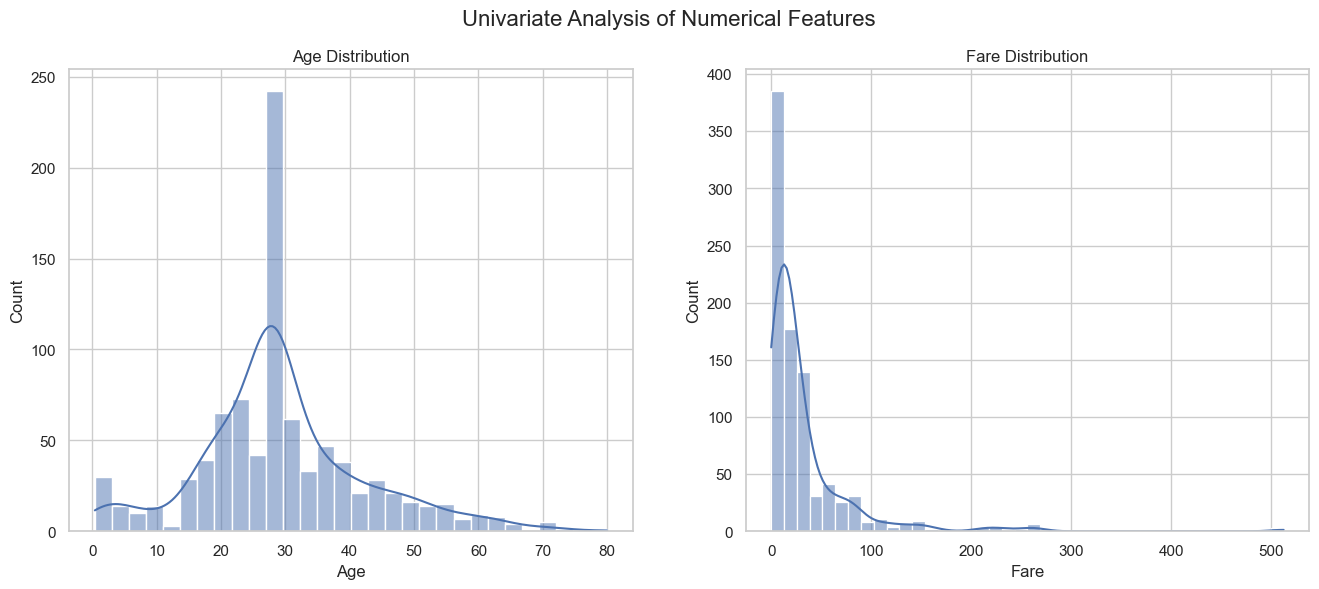

In [33]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

**Key Insights (Numerical):**
- Age: The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- Fare: The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

**Bivariate Analysis:** This type of analysis involves two different variables, and its main purpose is to find relationships between them.

- Categorical vs. Numerical: To compare a numerical variable across different categories, we often use bar plots (barplot) that show the mean (or another estimator) of the numerical variable for each category. We can also use box plots or violin plots.
- Categorical vs. Categorical: We can use stacked bar charts or contingency tables (crosstabs).
- Numerical vs. Numerical: A scatter plot is the standard choice, with a correlation matrix being used to quantify the relationship.

Bivariate Analysis: Feature vs. Survival


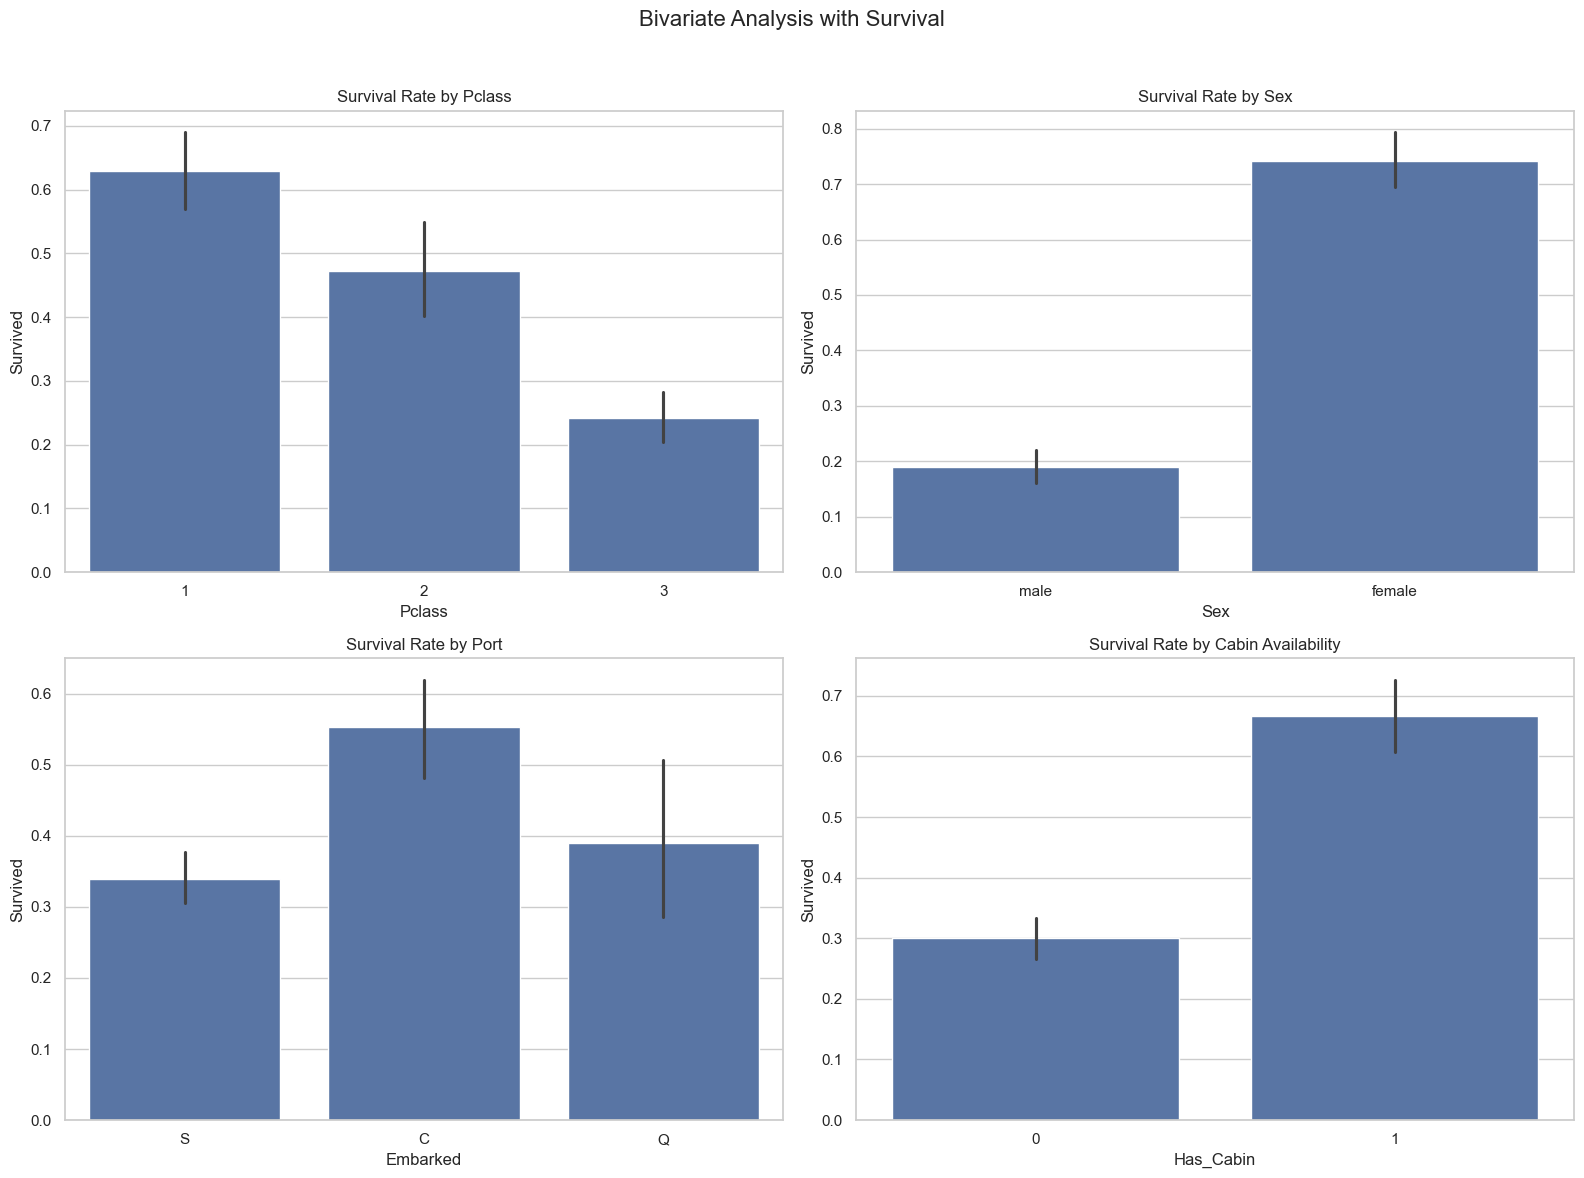

In [34]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Bivariate):**
- Pclass: A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- Sex: This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- Embarked: Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- Has_Cabin: Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

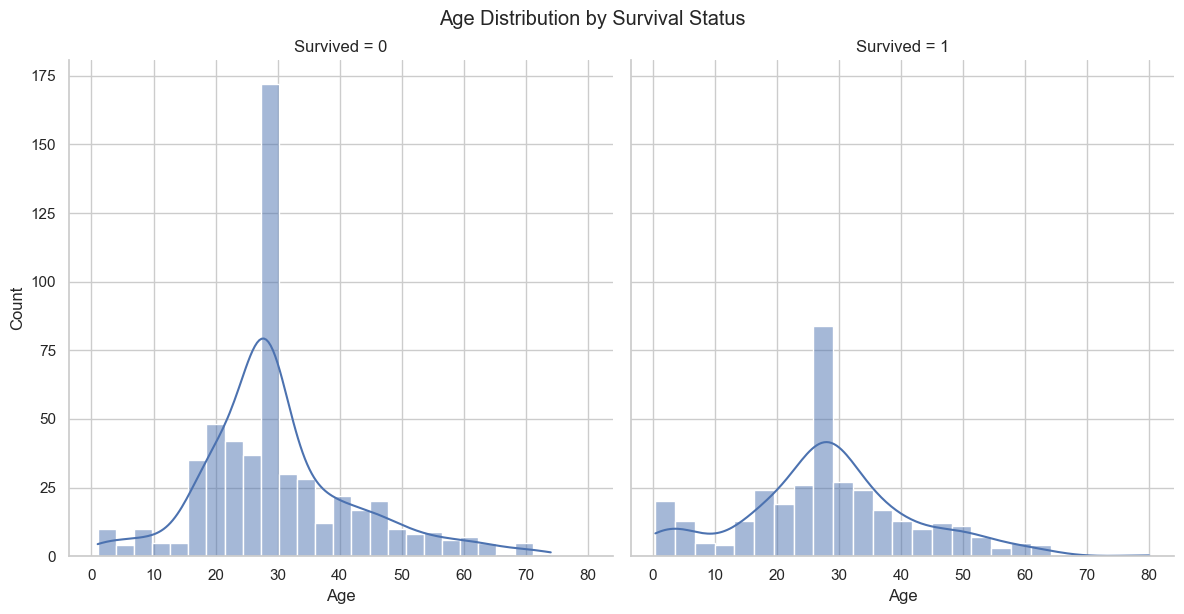

In [35]:
# Age vs. Survival
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

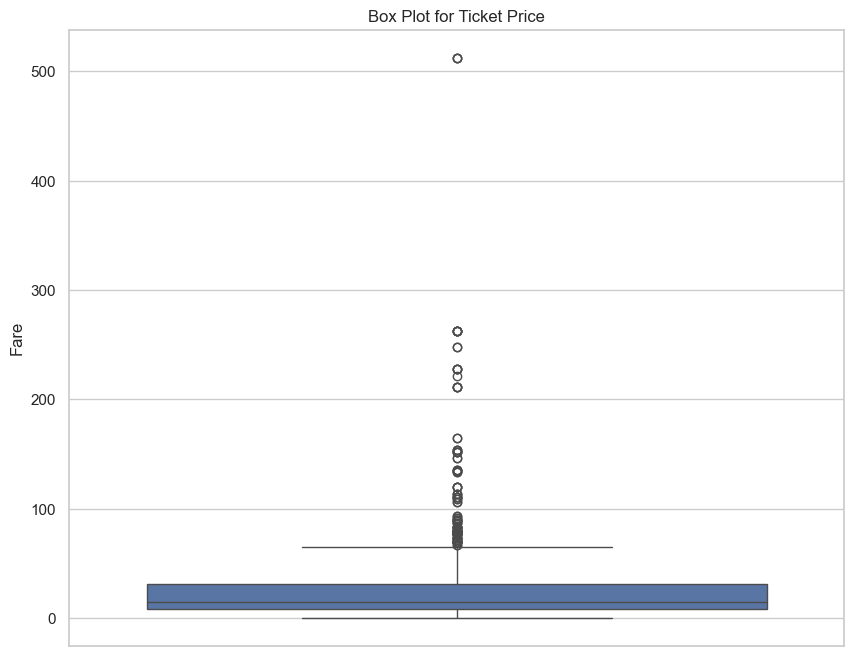

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Fare', data=df)
plt.title('Box Plot for Ticket Price')
plt.ylabel("Fare")
plt.show()

**Observation:**
- The box plot confirms the presence of significant outliers. 
- Most fares are concentrated below 100, but there are several fares extending far beyond, with some even exceeding $500. 
- These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

**Feature Engineering:** Creating new features from raw data
- Combining Features: Creating a new feature by combining others (e.g., SibSp + Parch = FamilySize).
- Extracting from Text: Pulling out specific information from a text feature (e.g., extracting titles from the Name column).
- Binning: Converting a continuous numerical feature into a categorical one (e.g., binning Age into groups like 'Child', 'Adult', 'Senior').

In [37]:
## Create a "familySIZE" column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2. Create an 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

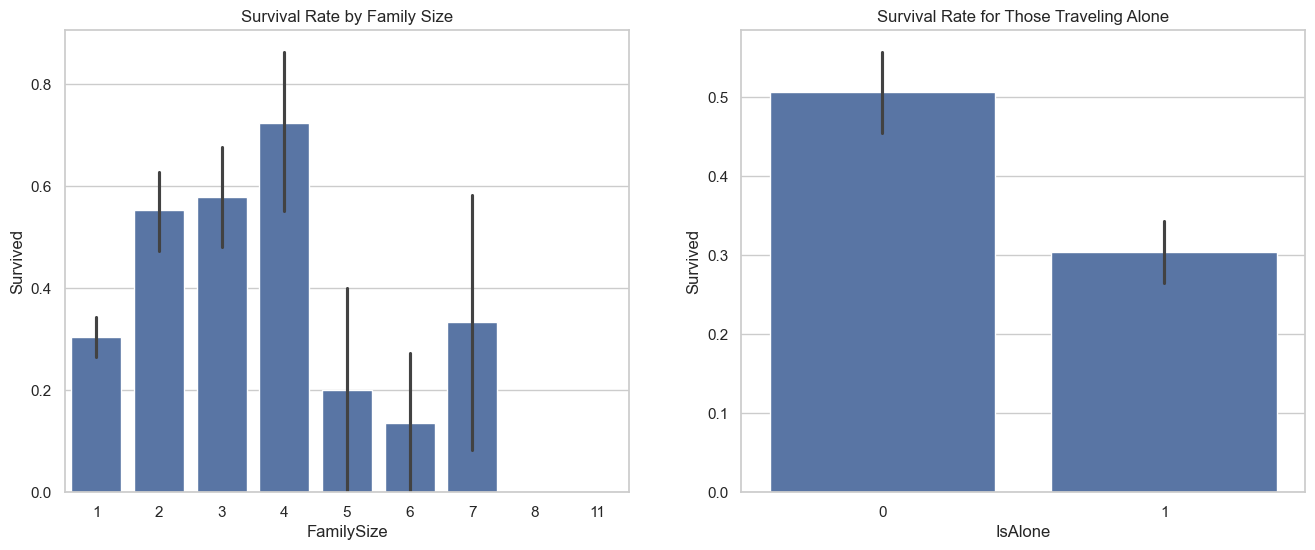

In [38]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

**Insight:**
- Passengers who were alone (IsAlone=1) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

In [39]:
# 3. Extract 'Title' from the 'Name' column
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

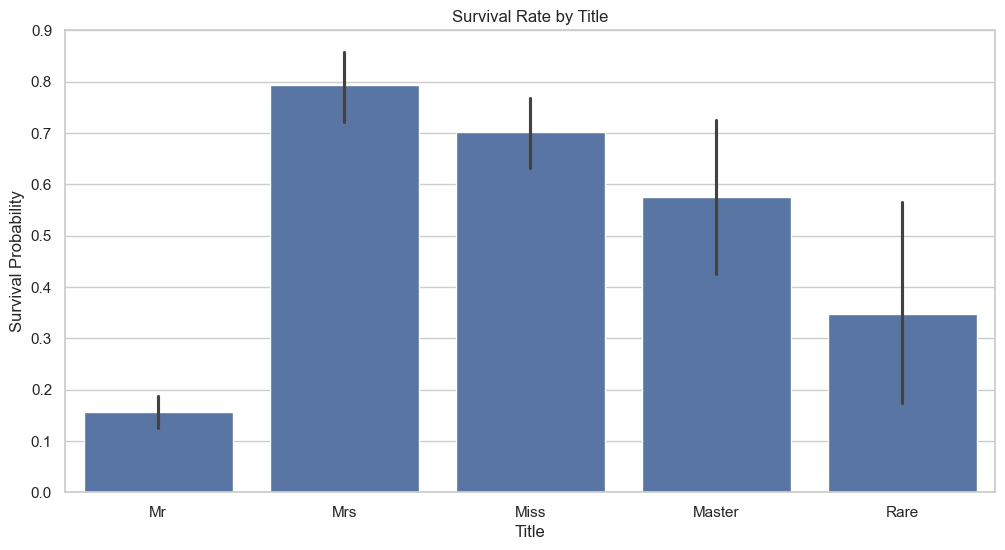

In [40]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Insight:**
- The Title feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate.
- 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. 
- The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

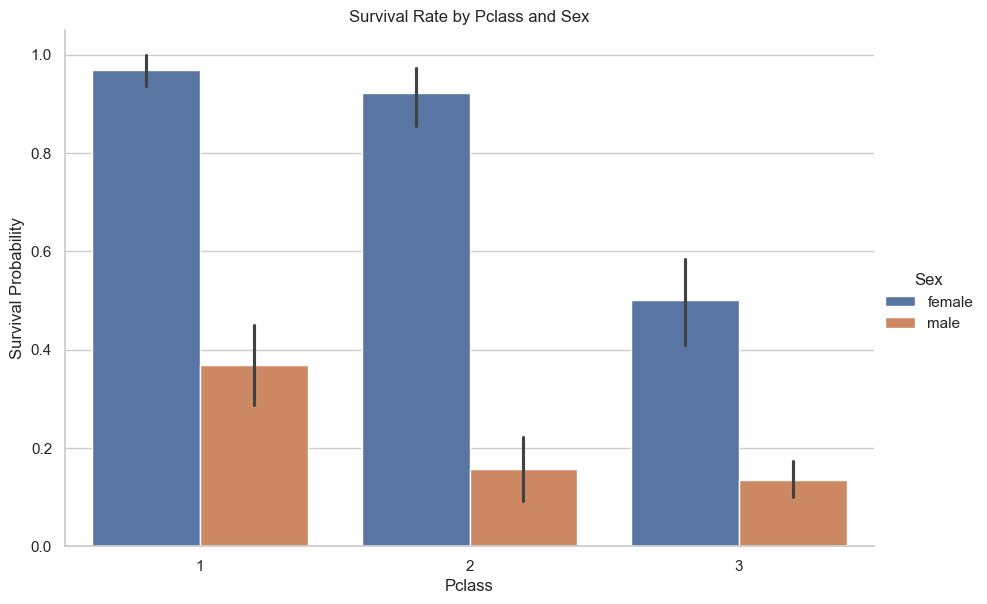

In [41]:
# Step 7: Multivariate Analysis interactions between multiple variables

# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()


**Insights:**
- Females in all classes had a significantly higher survival rate than males.

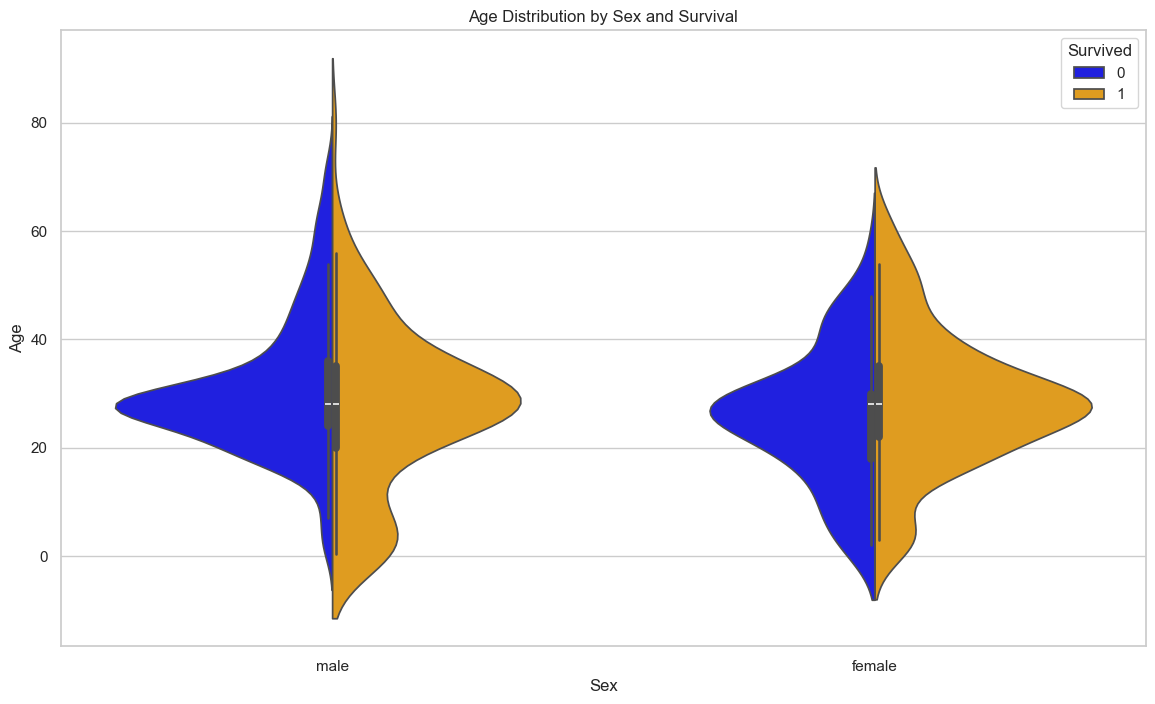

In [42]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

**Insight from Violin Plot:**
- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

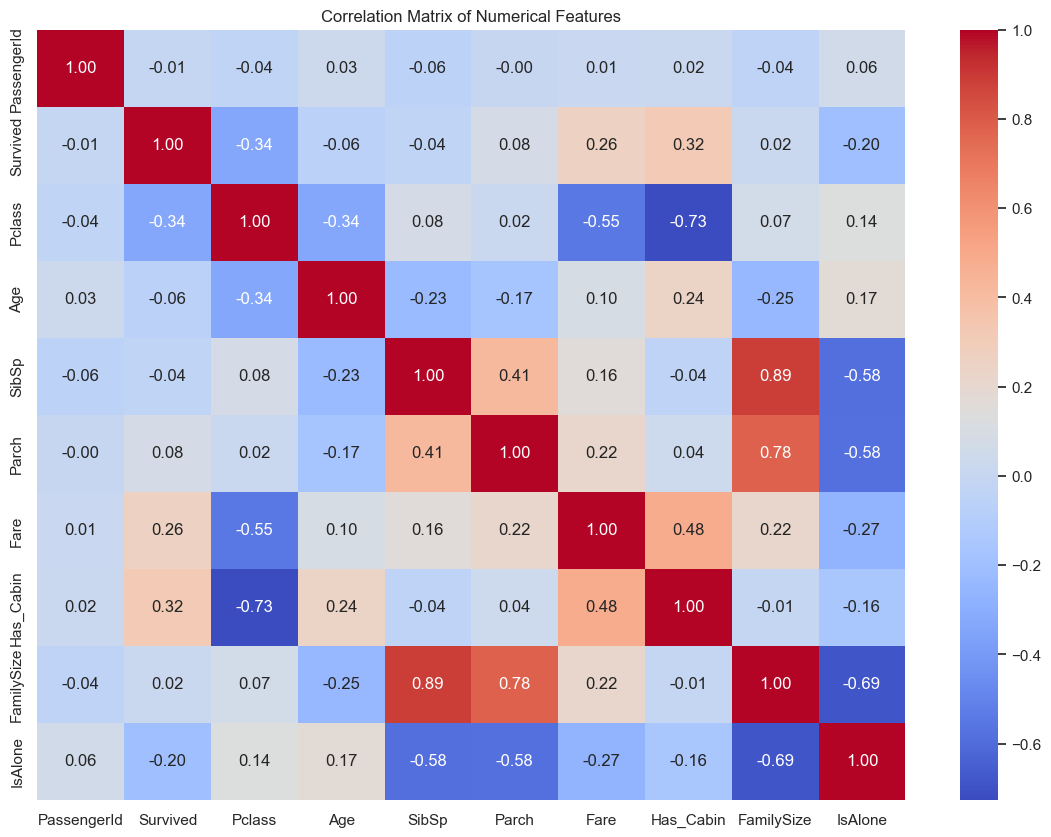

In [43]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Interpretation of the Heatmap:**
- Survived has a notable positive correlation with Fare and Has_Cabin, and a negative correlation with Pclass and our new IsAlone feature.
- Pclass and Fare are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new FamilySize feature is composed of SibSp and Parch, so it's highly correlated with them by definition.

In [45]:
df.to_csv("cleanTitanic_data.csv", index=False)